In [85]:
#Spam Ham classification using npl
#!pip install nltk
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('/content/spam.csv' , encoding='latin-1')
df.head()
df.sample(5);

In [87]:
df.shape

(5572, 5)

In [88]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [90]:
df.sample(5)

,v1,v2
4772,ham,Ok then u tell me wat time u coming later lor.
4509,ham,This weekend is fine (an excuse not to do too ...
2292,ham,:-( that's not v romantic!
2355,ham,"Hello, my love ! How went your day ? Are you a..."
3076,ham,There is no sense in my foot and penis.


In [91]:
#remaining columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3092,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
5136,ham,There are some nice pubs near here or there is...
2835,ham,Nice.nice.how is it working?
2837,ham,Were trying to find a Chinese food place aroun...
2467,ham,Is there coming friday is leave for pongal?do ...


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
#to check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [96]:
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [97]:
df.duplicated().sum()

0

In [98]:
df.shape

(5169, 2)

In [99]:
#EDA=Exploratory Data Analysis

In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

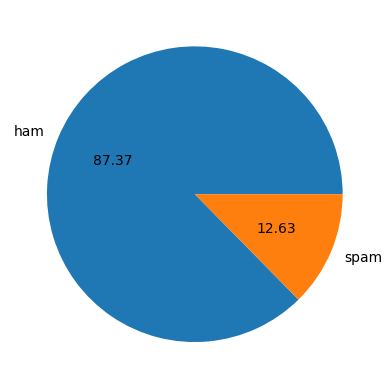

In [102]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt. show()

In [103]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [105]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [106]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
df['num_sentences']=df["text"].apply(lambda x: nltk.word_tokenize(x))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [108]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [109]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [110]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [111]:
df[df['target'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

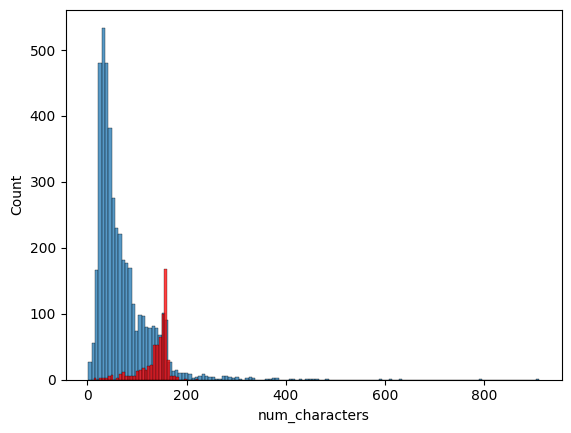

In [112]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

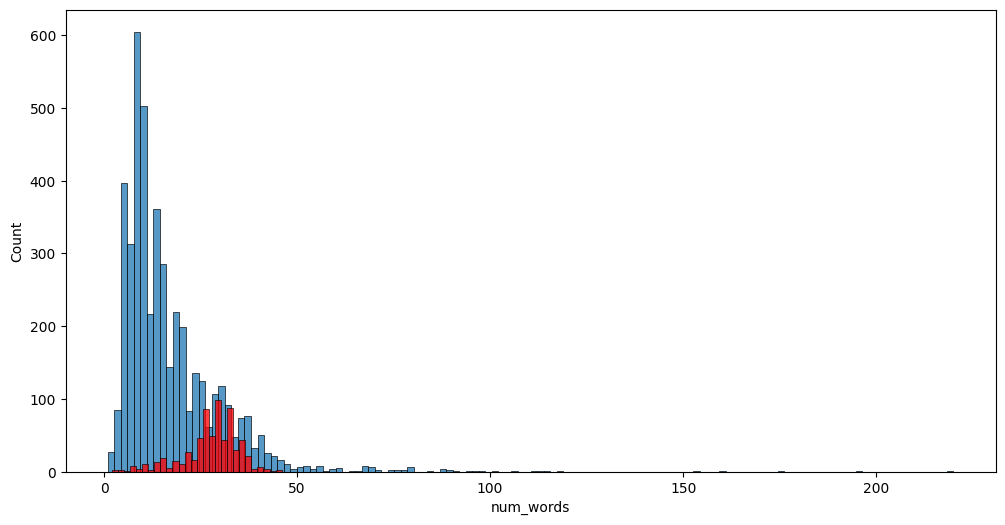

In [113]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

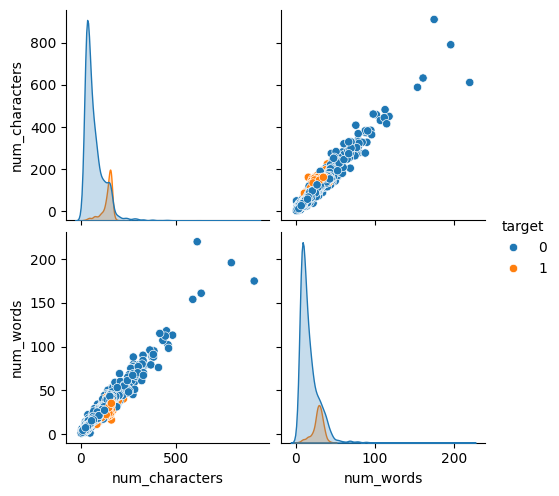

In [114]:
sns.pairplot(df,hue='target')

In [115]:
df_numeric = df.select_dtypes(include=['number'])
(df_numeric.corr())

,target,num_characters,num_words
target,1.000000,0.384717,0.262912
num_characters,0.384717,1.000000,0.965760
num_words,0.262912,0.965760,1.000000


In [116]:
#Data Preprocessing

In [117]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [118]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [119]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string # Import the string module

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Now you can use string.punctuation
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

transform_text("Did you like my presentation on ML?")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'like present ml'

In [120]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string # Import the string module
from nltk.stem import PorterStemmer # Import the PorterStemmer

ps = PorterStemmer() # Initialize the Porter Stemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Now you can use string.punctuation
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) # Now you can use ps to call the stemmer
    return " ".join(y)

transform_text("Did you like my presentation on ML?")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'like present ml'

In [121]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [122]:
transform_text("I loved the music")

'love music'

In [123]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go, until, jurong, point, ,, crazy, .., Avail...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea...",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",nah think goe usf live around though


In [124]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10, background_color='white')

In [125]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

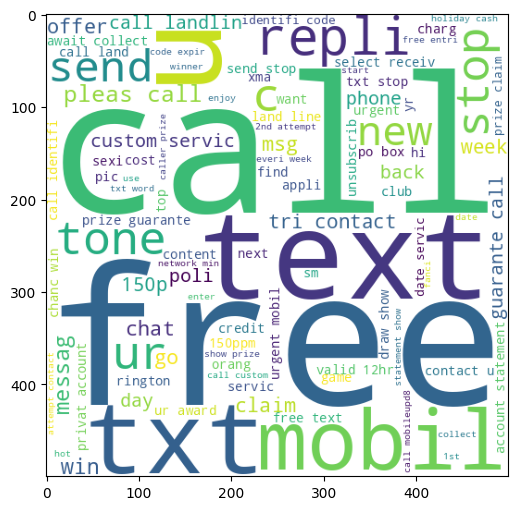

In [126]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

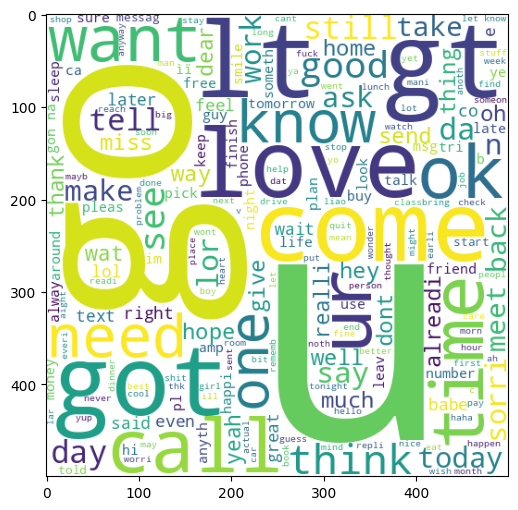

In [127]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [128]:
spam_corpus=[]
from os.path import split
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
      spam_corpus.append(words)

In [129]:
len(spam_corpus)

9939

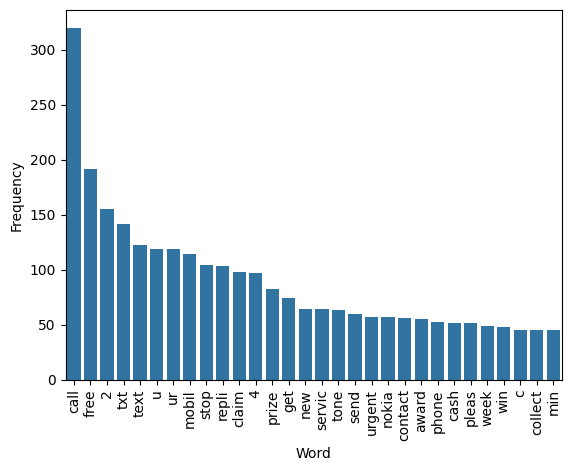

In [132]:
import matplotlib.pyplot as plt
from collections import Counter # Import the Counter class

# Create a dataframe from the counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the dataframe columns as arguments in the Seaborn barplot function
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [133]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
      ham_corpus.append(words)

In [134]:
len(ham_corpus)

35404

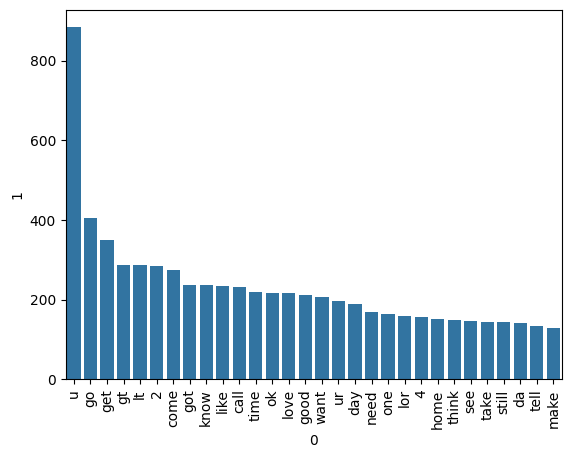

In [135]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [160]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

x=tfidf.fit_transform(df['transformed_text']).toarray()

x.shape

(5169, 3000)

In [161]:

y=df['target'].values

y

array([0, 0, 1, ..., 0, 0, 0])

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [164]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [165]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [166]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [143]:
#tfidf-->MultinomialNB
#Maximum Precision